In [1]:
# ===============================================
# 🌍 COVID-19 Global Data Analysis and Visualization
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
# Make sure 'covid_19_data.csv' (from Kaggle) is uploaded in the Colab working directory
df = pd.read_csv("covid_19_data.csv")
print("✅ Dataset loaded successfully!")
df.head()

✅ Dataset loaded successfully!


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n❓ Missing Values:")
print(df.isnull().sum())

# Rename columns if necessary
df.rename(columns={
    'ObservationDate': 'Date',
    'Country/Region': 'Country',
    'Province/State': 'Province'
}, inplace=True)

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None

❓ Missing Values:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: i

In [4]:
country_data = df.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
global_data = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
global_data.tail()

,Date,Confirmed,Deaths,Recovered
183,2020-07-23,15510481,633506,8710969
184,2020-07-24,15791645,639650,8939705
185,2020-07-25,16047190,644517,9158743
186,2020-07-26,16251796,648621,9293464
187,2020-07-27,16480485,654036,9468087


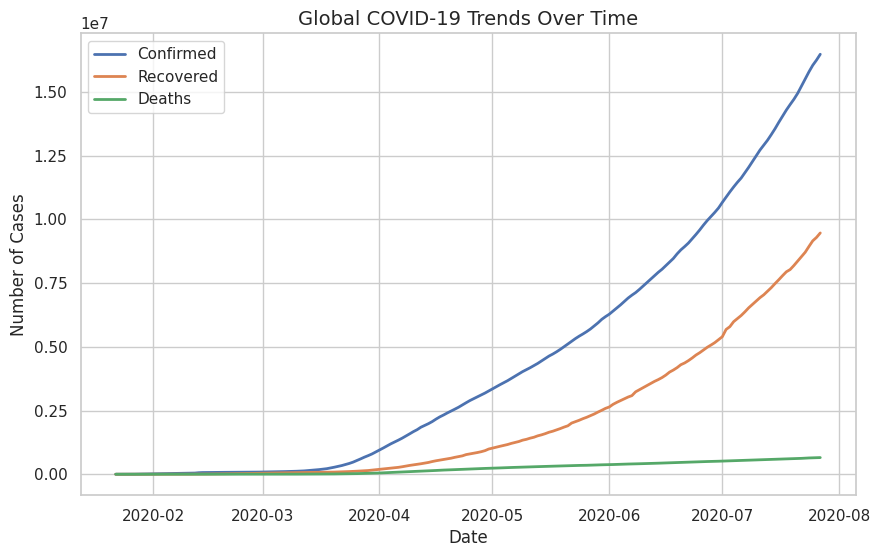

In [5]:
plt.figure(figsize=(10,6))
plt.plot(global_data['Date'], global_data['Confirmed'], label='Confirmed', linewidth=2)
plt.plot(global_data['Date'], global_data['Recovered'], label='Recovered', linewidth=2)
plt.plot(global_data['Date'], global_data['Deaths'], label='Deaths', linewidth=2)
plt.title('Global COVID-19 Trends Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

          Date  Confirmed  Recovered  Deaths  RecoveryRate  DeathRate
183 2020-07-23   15510481    8710969  633506     56.161824   4.084374
184 2020-07-24   15791645    8939705  639650     56.610347   4.050560
185 2020-07-25   16047190    9158743  644517     57.073812   4.016385
186 2020-07-26   16251796    9293464  648621     57.184228   3.991073
187 2020-07-27   16480485    9468087  654036     57.450293   3.968548


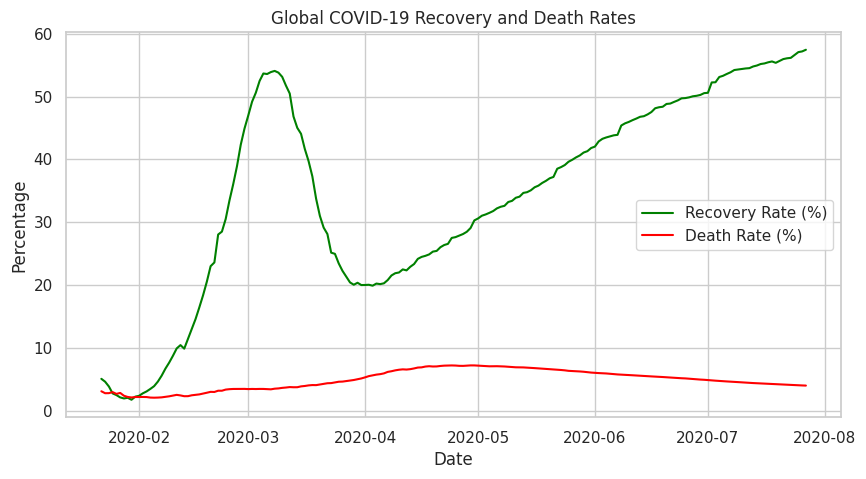

In [6]:
global_data['NewCases'] = global_data['Confirmed'].diff().fillna(0)
global_data['RecoveryRate'] = (global_data['Recovered'] / global_data['Confirmed']) * 100
global_data['DeathRate'] = (global_data['Deaths'] / global_data['Confirmed']) * 100

print(global_data[['Date', 'Confirmed', 'Recovered', 'Deaths', 'RecoveryRate', 'DeathRate']].tail())

plt.figure(figsize=(10,5))
plt.plot(global_data['Date'], global_data['RecoveryRate'], label='Recovery Rate (%)', color='green')
plt.plot(global_data['Date'], global_data['DeathRate'], label='Death Rate (%)', color='red')
plt.title('Global COVID-19 Recovery and Death Rates')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2322641256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10['Confirmed'], y=top10.index, palette='Reds_r')


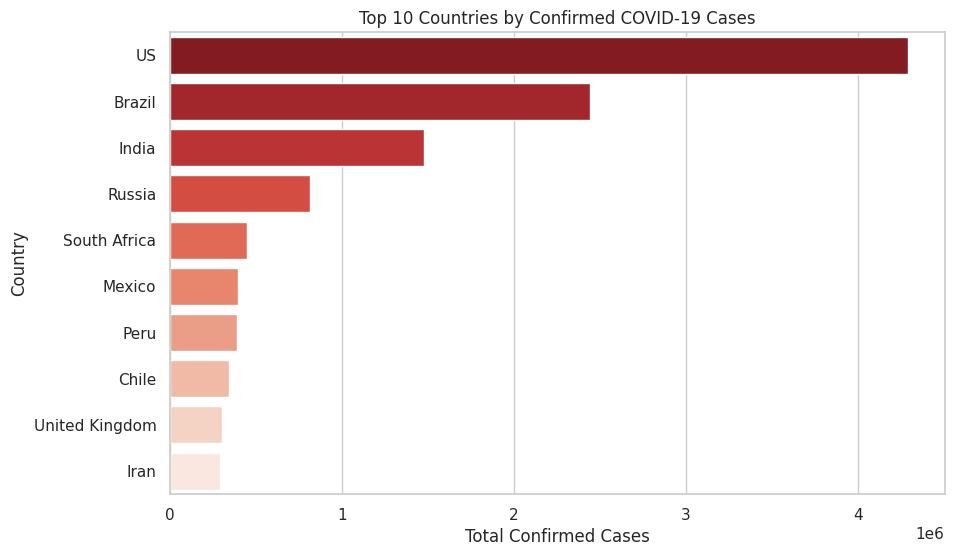

In [7]:
latest = country_data[country_data['Date'] == country_data['Date'].max()]
top10 = latest.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10['Confirmed'], y=top10.index, palette='Reds_r')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

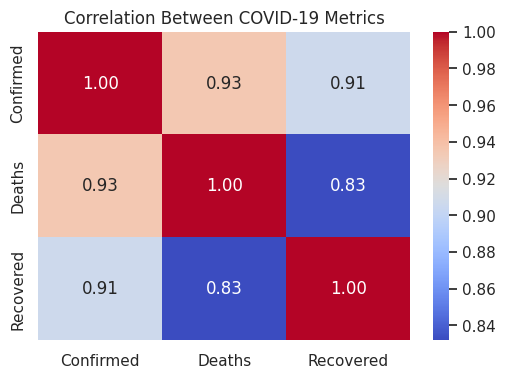

In [8]:
corr = latest[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between COVID-19 Metrics')
plt.show()

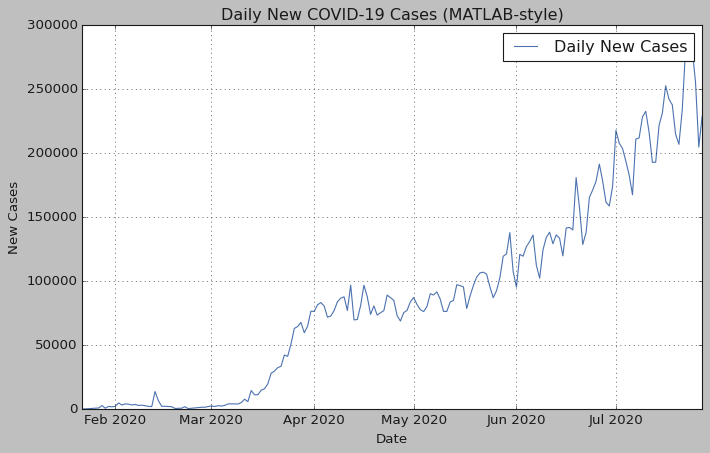

In [9]:
plt.style.use('classic')
plt.figure(figsize=(10,6))
plt.plot(global_data['Date'], global_data['NewCases'], 'b-', label='Daily New Cases')
plt.title('Daily New COVID-19 Cases (MATLAB-style)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
cleaned_path = "covid19_cleaned.csv"
country_data.to_csv(cleaned_path, index=False)
print(f"💾 Cleaned dataset saved as '{cleaned_path}'")
print("\n✅ COVID-19 Data Analysis Completed Successfully!")

💾 Cleaned dataset saved as 'covid19_cleaned.csv'

✅ COVID-19 Data Analysis Completed Successfully!
